IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
!pip install pingouin
import pingouin as pg
import statsmodels.stats.power as smp

UPLOAD THE ASSIGNMENT 4 FILE

In [13]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving INF2178_A4_data.csv to INF2178_A4_data (1).csv
User uploaded file "INF2178_A4_data (1).csv" with length 24450 bytes


CREATE DATAFRAME

In [ ]:
assignment4_data = "INF2178_A4_data.csv"
assignment4_data= pd.read_csv(assignment4_data)
assignment4_data

DATA CLEANING

In [42]:
# Exclude records with missing MMSE values
assignment4_data.dropna(subset=['MMSE'], inplace=True)

# Display the first few rows to confirm changes
print(assignment4_data.head())
# Check for any remaining missing values across the dataset
print(assignment4_data.isnull().sum())

   Unnamed: 0 Subject ID         MRI ID        Group  Visit  MR Delay Sex  \
0           0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M   
1           1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M   
2           2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M   
3           3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M   
4           5  OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F   

  Hand  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  std_residuals  
0    R   87    14  2.0  27.0  0.0  1987  0.696  0.883      -1.241030  
1    R   88    14  2.0  30.0  0.0  2004  0.681  0.876       1.115504  
2    R   75    12  2.0  23.0  0.5  1678  0.736  1.046      -1.840846  
3    R   76    12  2.0  28.0  0.5  1738  0.713  1.010       2.072237  
4    R   88    18  3.0  28.0  0.0  1215  0.710  1.444       0.132287  
Unnamed: 0       0
Subject ID       0
MRI ID           0
Group            0
Visit            0
MR Delay        

EXPLORATORY DATA ANALYSIS

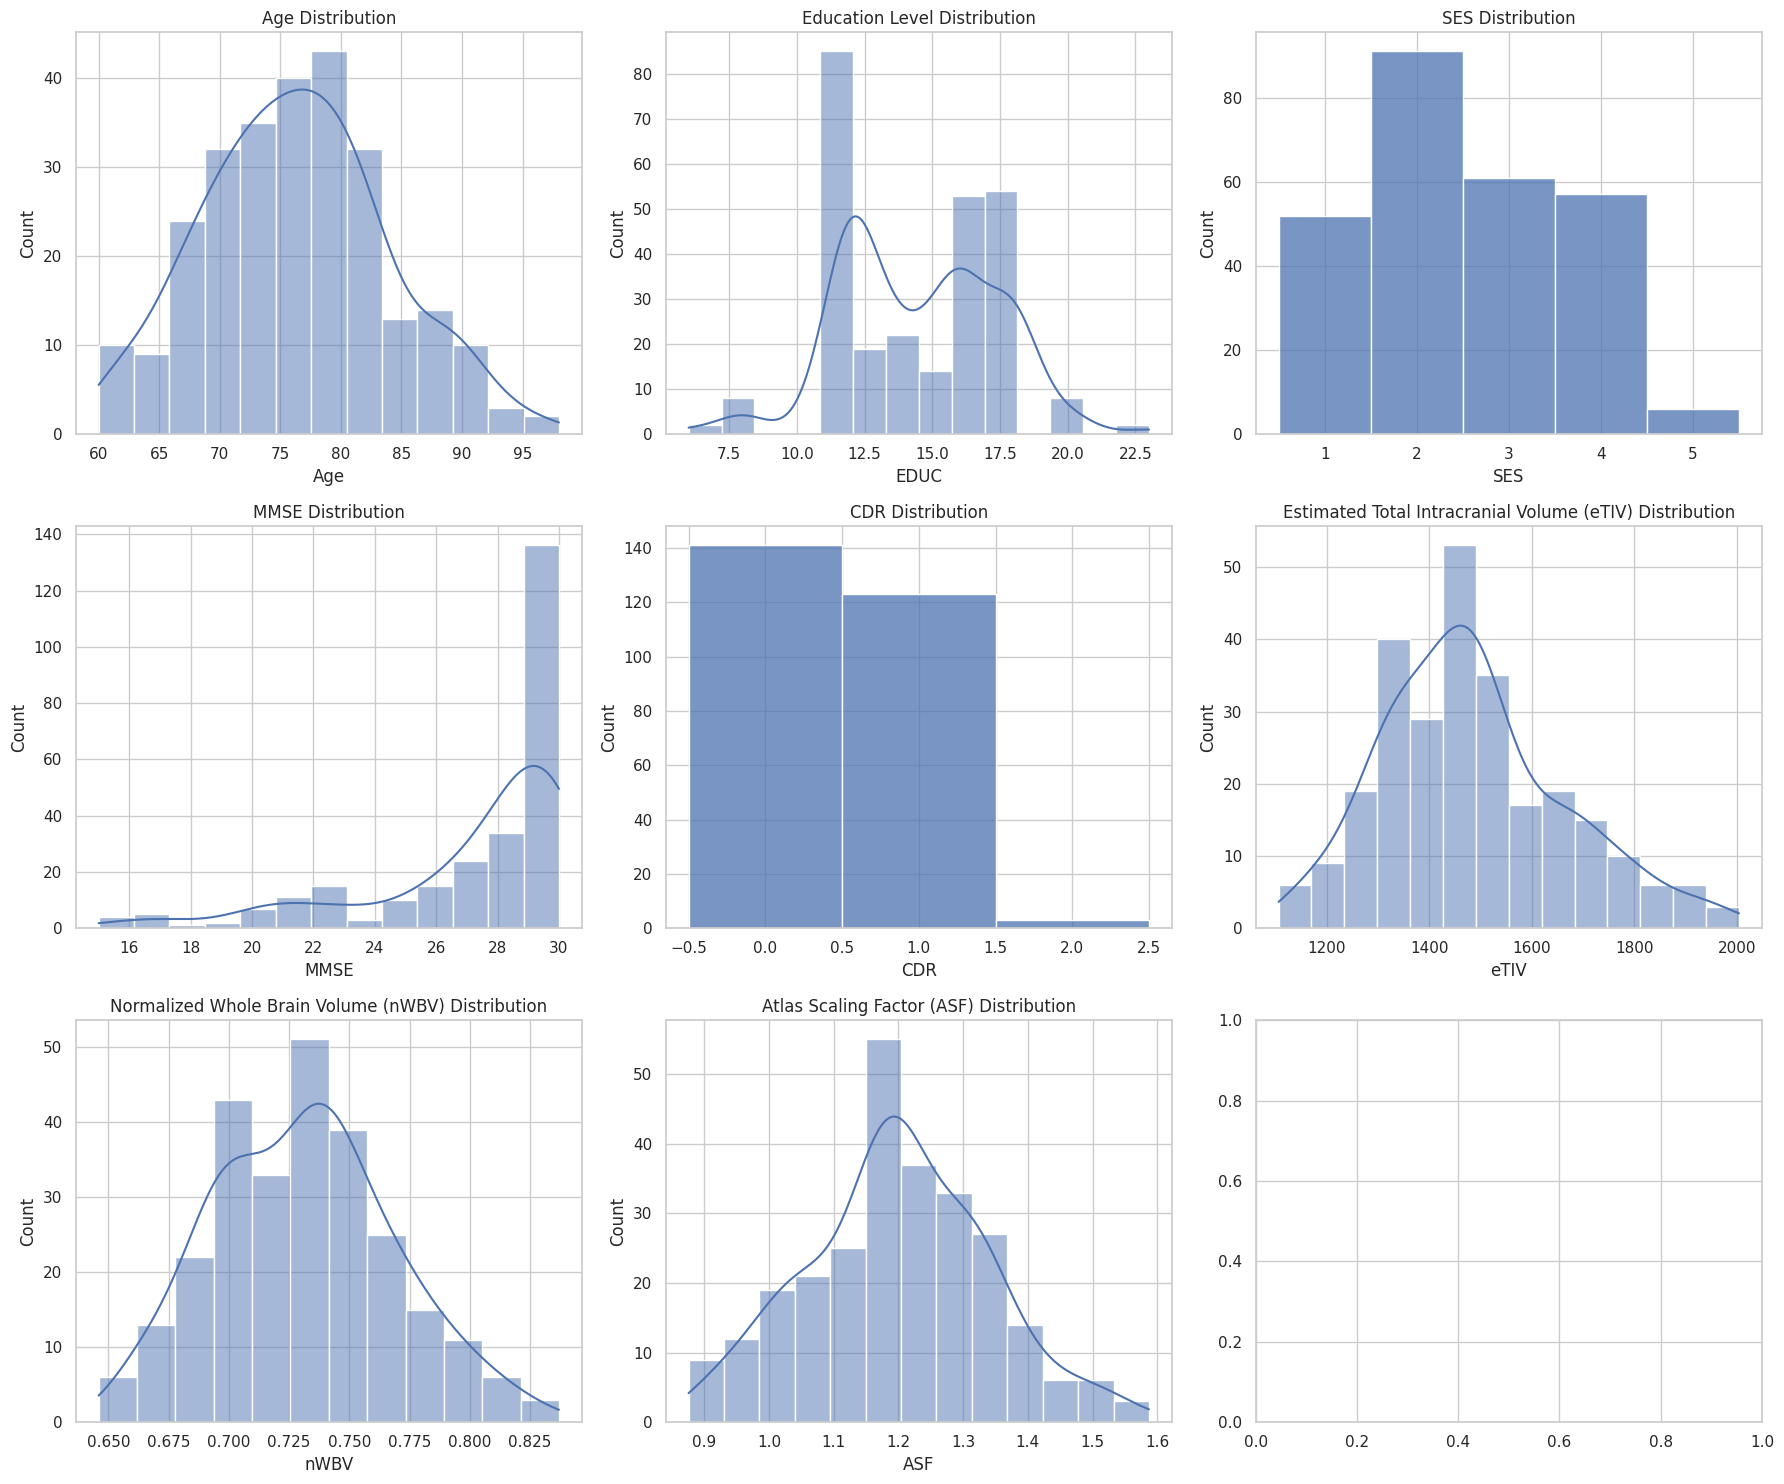

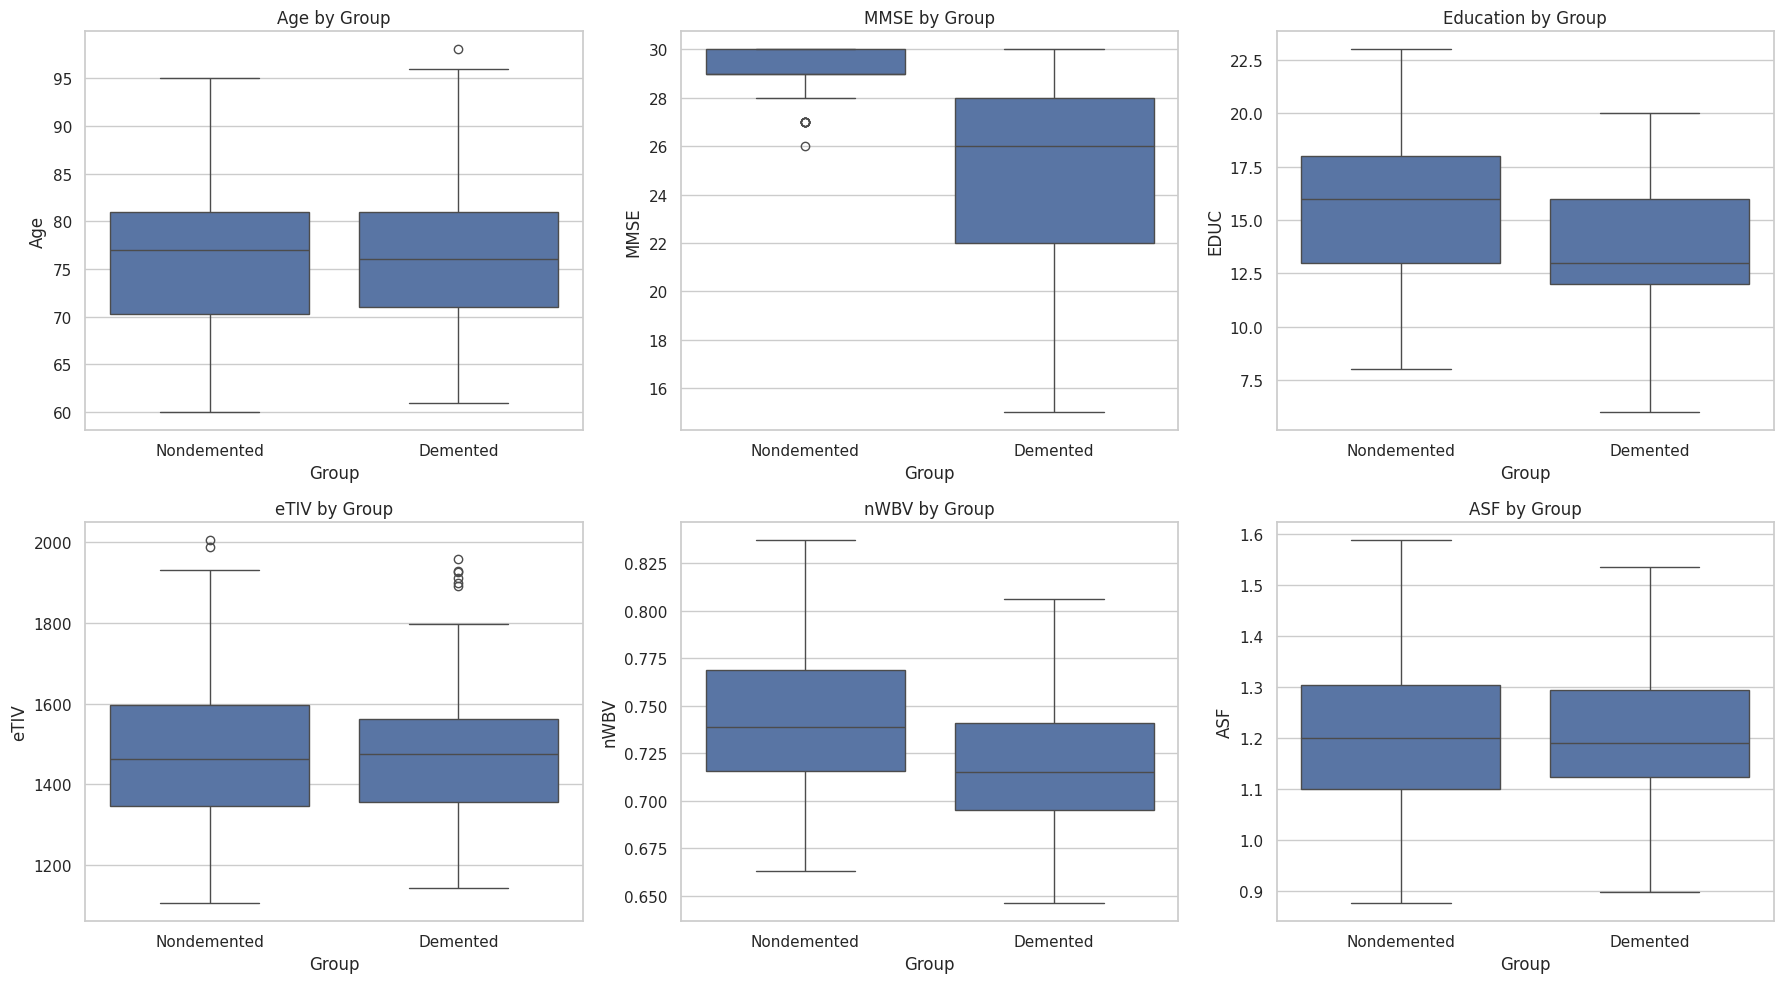

In [62]:
# Setting aesthetic style for the plots
sns.set(style="whitegrid")

# EDA: Distribution of key numerical variables
fig, axs = plt.subplots(3, 3, figsize=(18, 15))

# Age Distribution
sns.histplot(assignment4_data['Age'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

# Education Level Distribution
sns.histplot(assignment4_data['EDUC'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Education Level Distribution')

# SES Distribution
sns.histplot(assignment4_data['SES'], kde=False, discrete=True, ax=axs[0, 2])
axs[0, 2].set_title('SES Distribution')

# MMSE Distribution
sns.histplot(assignment4_data['MMSE'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('MMSE Distribution')

# CDR Distribution
sns.histplot(assignment4_data['CDR'], kde=False, discrete=True, ax=axs[1, 1])
axs[1, 1].set_title('CDR Distribution')

# eTIV Distribution
sns.histplot(assignment4_data['eTIV'], kde=True, ax=axs[1, 2])
axs[1, 2].set_title('Estimated Total Intracranial Volume (eTIV) Distribution')

# nWBV Distribution
sns.histplot(assignment4_data['nWBV'], kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Normalized Whole Brain Volume (nWBV) Distribution')

# ASF Distribution
sns.histplot(assignment4_data['ASF'], kde=True, ax=axs[2, 1])
axs[2, 1].set_title('Atlas Scaling Factor (ASF) Distribution')

plt.tight_layout()
plt.show()

# Boxplots for detecting outliers
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(x='Group', y='Age', data=assignment4_data, ax=axs[0, 0])
axs[0, 0].set_title('Age by Group')

sns.boxplot(x='Group', y='MMSE', data=assignment4_data, ax=axs[0, 1])
axs[0, 1].set_title('MMSE by Group')

sns.boxplot(x='Group', y='EDUC', data=assignment4_data, ax=axs[0, 2])
axs[0, 2].set_title('Education by Group')

sns.boxplot(x='Group', y='eTIV', data=assignment4_data, ax=axs[1, 0])
axs[1, 0].set_title('eTIV by Group')

sns.boxplot(x='Group', y='nWBV', data=assignment4_data, ax=axs[1, 1])
axs[1, 1].set_title('nWBV by Group')

sns.boxplot(x='Group', y='ASF', data=assignment4_data, ax=axs[1, 2])
axs[1, 2].set_title('ASF by Group')

plt.tight_layout()
plt.show()


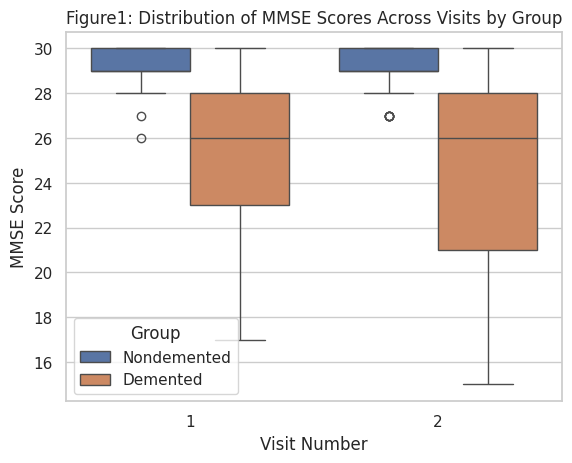

In [53]:
#Create Boxplot

#Drop 'Converted' boxplot in the visualization

assignment4_data = assignment4_data[assignment4_data['Group'] != 'Converted']

sns.boxplot(data=assignment4_data, x='Visit', y='MMSE', hue='Group')
plt.title('Figure1: Distribution of MMSE Scores Across Visits by Group')
plt.xlabel('Visit Number')
plt.ylabel('MMSE Score')
plt.legend(title='Group')
plt.show()


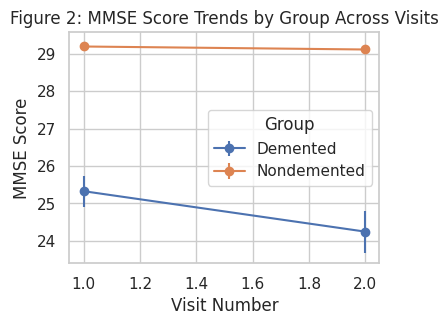

In [43]:
# Create plot for MMSE Score Trends by Group Across visits
# First, calculate the mean and standard error for each group and visit.
grouped = assignment4_data.groupby(['Group', 'Visit'])['MMSE']
means = grouped.mean()
errors = grouped.sem()

# Create the figure and a set of subplots
fig, ax = plt.subplots(figsize=(4, 3))

# Plot the error bars for each group and visit
for group in ['Demented', 'Nondemented']:
    ax.errorbar(x=[1, 2], y=means[group].values, yerr=errors[group].values, fmt='-o', label=group)

# Customize the plot
ax.set_title('Figure 2: MMSE Score Trends by Group Across Visits')
ax.set_xlabel('Visit Number')
ax.set_ylabel('MMSE Score')
ax.legend(title='Group')


In [44]:
# Group the DataFrame by 'Visit' and 'Group', then calculate the mean and standard deviation for 'MMSE' scores
summary_stats = assignment4_data.groupby(['Visit', 'Group'])['MMSE'].agg(['mean', 'std']).round(2)

# Display the summary statistics
print(summary_stats)

# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=assignment4_data)

# Pretty printing of ANOVA summary
pg.print_table(aov)



                    mean   std
Visit Group                   
1     Converted    29.36  0.93
      Demented     25.33  3.32
      Nondemented  29.19  0.85
2     Converted    28.00  2.09
      Demented     24.25  4.40
      Nondemented  29.11  0.96

ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc    np2      eps
-----------  --------  -----  -----  -------  ------  -------  -----  -------
Group        1328.421      2    140  664.211  56.212    0.000  0.445  nan
Visit          22.378      1    140   22.378   8.859    0.003  0.060    1.000
Interaction    17.000      2    140    8.500   3.365    0.037  0.046  nan



CHECKING FOR NORMALITY, SPHERICITY ANF HOMOGENITY

In [45]:
# Residuals from the model
residuals = result.resid

# Shapiro-Wilk test for normality
grouped = assignment4_data.groupby('Visit')
for name, group in grouped:
    stat, p = shapiro(group['MMSE'])
    print(f"Shapiro-Wilk test for Visit {name}: Statistics={stat:.3g}, p-value={p:.3g}")

# Levene's Test for homogenity
levene_test = stats.levene(assignment4_data['MMSE'], result.fittedvalues)
print(f"Levene's test statistic: {levene_test[0]}, p-value: {levene_test[1]}")

# Conducting Mauchly's test for Sphericity and capturing the p-value
mauchly_p_value = pg.sphericity(data=assignment4_data, dv='MMSE', subject='Subject ID', within='Visit')

print(f"Mauchly's test p-value: {mauchly_p_value}")

Shapiro-Wilk test for Visit 1: Statistics=0.787, p-value=1.76e-13
Shapiro-Wilk test for Visit 2: Statistics=0.761, p-value=5.43e-14
Levene's test statistic: 1.642653502890748, p-value: 0.20047039629072474
Mauchly's test p-value: (True, nan, nan, 1, 1.0)


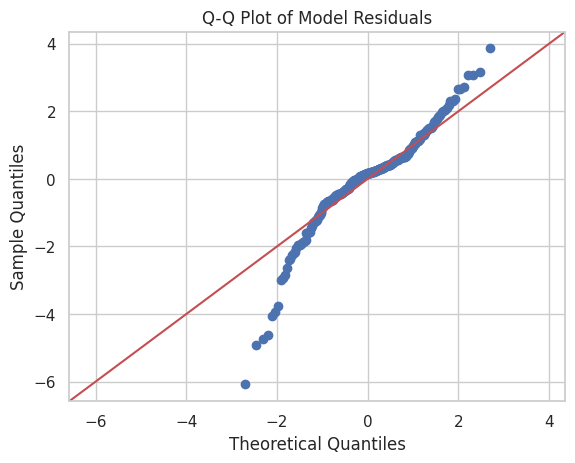

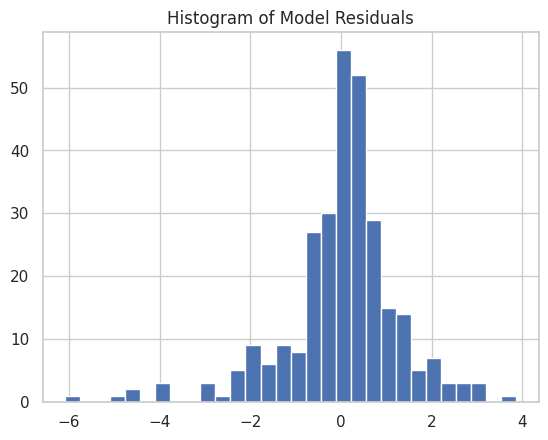

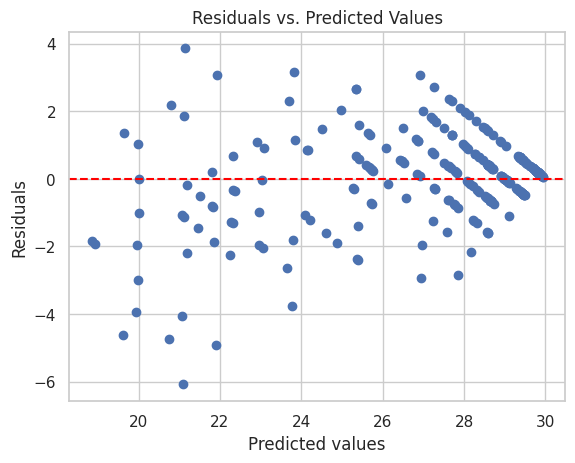

In [46]:
# Q-Q plot
fig = sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Model Residuals')
plt.show()

# Histogram
plt.hist(residuals, bins=30)
plt.title('Histogram of Model Residuals')
plt.show()

# Plot of residuals against predicted values
plt.scatter(result.fittedvalues, residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


MIXED LINEAR MODEL REGRESSION

In [47]:
#MMSE Score Trends by gender Across Visits
# Rename the 'M/F' column to 'Sex'
assignment4_data.rename(columns={'M/F': 'Sex'}, inplace=True)
# Ensure the 'Sex' column is of type 'category'
assignment4_data['Sex'] = assignment4_data['Sex'].astype('category')

# Fit the mixed linear model with the updated column name
model = smf.mixedlm("MMSE ~ C(Visit)*C(Sex)", data=assignment4_data, groups=assignment4_data["Subject ID"]).fit()
print(model.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     MMSE     
No. Observations:      293         Method:                 REML     
No. Groups:            150         Scale:                  2.5887   
Min. group size:       1           Log-Likelihood:         -705.0727
Max. group size:       2           Converged:              Yes      
Mean group size:       2.0                                          
--------------------------------------------------------------------
                          Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                 28.102    0.358 78.583 0.000 27.401 28.803
C(Visit)[T.2]             -0.769    0.248 -3.106 0.002 -1.254 -0.284
C(Sex)[T.M]               -1.312    0.556 -2.359 0.018 -2.402 -0.222
C(Visit)[T.2]:C(Sex)[T.M]  0.476    0.385  1.235 0.217 -0.280  1.231
Group Var                  8.665    1.028         

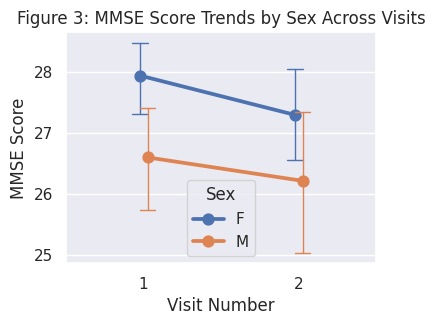

In [61]:
# create MMSE Score trends by Sex across visits using Sns
sns.set()
plt.figure(figsize=(4, 3))  # Setting the figure size
sns.pointplot(data=assignment4_data, x='Visit', y='MMSE', hue='Sex', dodge=True,
              capsize=.1, err_kws={'linewidth': 1})

plt.title('Figure 3: MMSE Score Trends by Sex Across Visits')
plt.xlabel('Visit Number')
plt.ylabel('MMSE Score')
plt.show()

CALCULATE SAMPLE SIZE

In [48]:
# Calculate the sample size using smp.TTestIndPower()
power_analysis = smp.TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=0.7, power=0.91, alpha=0.05)
sample_size

45.45073088568012

VISUALIZE POWER PLOT

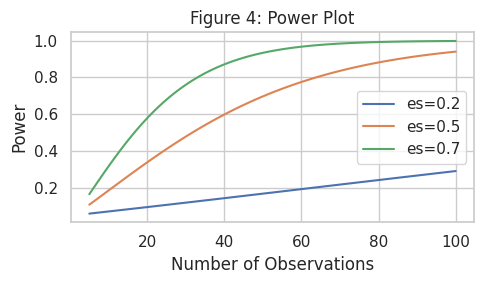

In [49]:
# Create a Power Plot
plt.figure(figsize=(5, 3))

# Values for power analysis
effect_sizes = [0.2, 0.5, 0.7]
sample_sizes = np.arange(5, 101)

# Perform power analysis and plot the curves
analysis = TTestIndPower()
for es in effect_sizes:
    power = analysis.power(es, sample_sizes, alpha=0.05)
    plt.plot(sample_sizes, power, label=f'es={es}')

# Add legend, title and labels to the plot
plt.legend()
plt.title('Figure 4: Power Plot')
plt.xlabel('Number of Observations')
plt.ylabel('Power')

# Display the plot
plt.tight_layout()
plt.show()
